    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

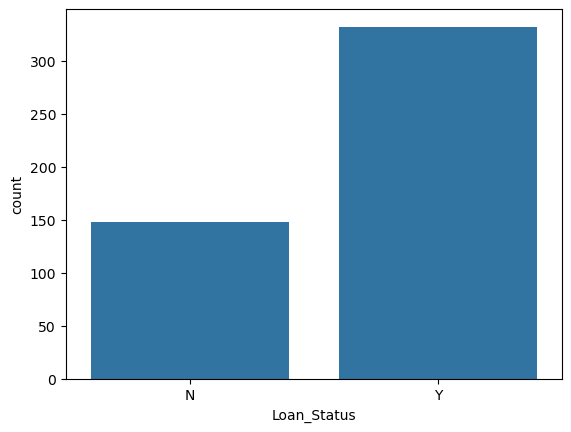

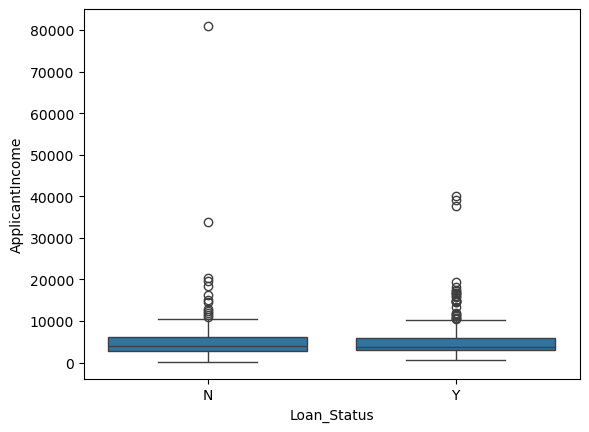

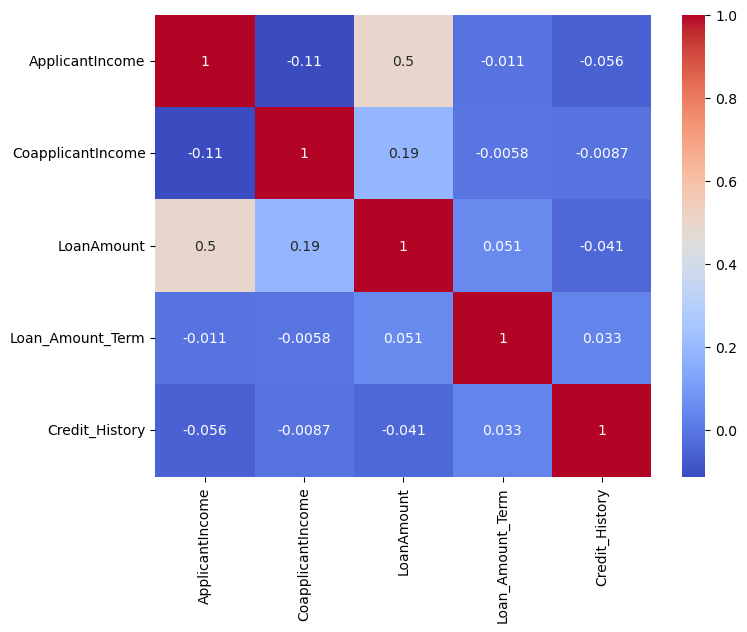

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        28
           1       0.80      0.99      0.88        68

    accuracy                           0.81        96
   macro avg       0.86      0.69      0.72        96
weighted avg       0.83      0.81      0.78        96

Cross-validation accuracy scores: [0.80208333 0.78125    0.77083333 0.86458333 0.8125    ]
Mean accuracy: 0.80625
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best CV score: 0.8048188653451811


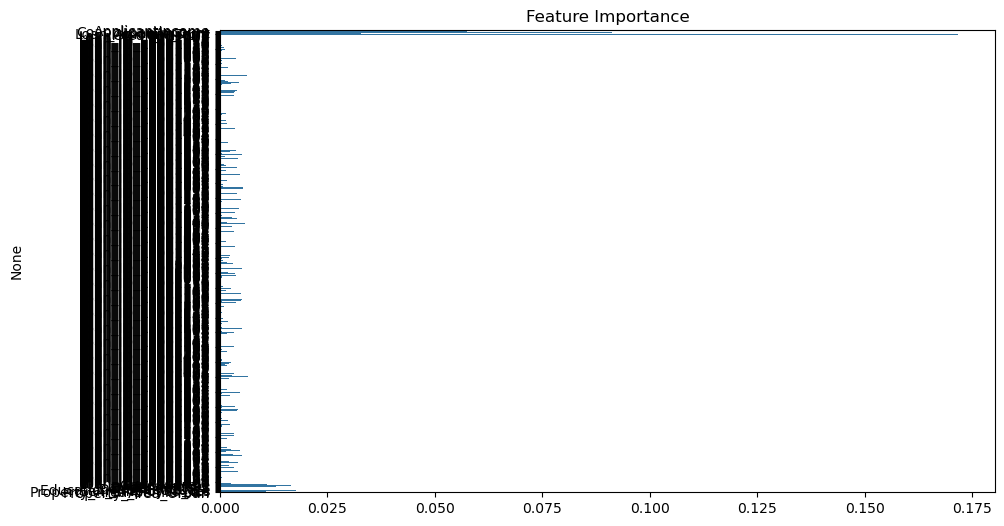

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("loan.csv")

# Quick overview
print(df.head())
print(df.info())
print(df.isnull().sum())

# Drop rows with missing values (simple approach)
df = df.dropna()

# Exploratory plots
sns.countplot(x='Loan_Status', data=df)
plt.show()

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()

# Correlation heatmap for numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Encode target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

# Drop rows where mapping failed (if any unexpected values exist)
df = df.dropna(subset=['Loan_Status'])

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status'].astype(int)   # ensure integer labels

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(y_test, pred))
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validation with RandomForest
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()